Chromatogram has no property mz.
Return retention time instead
[{'target': 100, 'RTs': [0.057766666667, 0.069166666667, 0.08055, 0.09195, 0.103333333333, 0.114716666667, 0.126116666667, 0.1375, 0.148883333333, 0.160283333333, 0.171666666667, 0.183066666667, 0.19445, 0.205833333333, 0.217233333333, 0.228616666667, 0.240016666667, 0.2514, 0.262783333333, 0.274183333333, 0.285566666667, 0.296966666667, 0.30835, 0.319733333333, 0.331133333333, 0.342516666667, 0.353916666667, 0.3653, 0.376683333333, 0.388083333333, 0.399466666667, 0.410866666667, 0.42225, 0.433633333333, 0.445033333333, 0.456416666667, 0.467816666667, 0.4792, 0.490583333333, 0.501983333333, 0.513366666667, 0.524766666667, 0.536149967448, 0.547533333333, 0.558933333333, 0.570316666667, 0.5817, 0.5931, 0.604483333333, 0.615883333333, 0.627266666667, 0.63865, 0.65005, 0.661433333333, 0.672833333333, 0.684216666667, 0.6956, 0.707, 0.718383333333, 0.729783333333, 0.741166666667, 0.75255, 0.76395, 0.775333333333, 0.786733333333, 

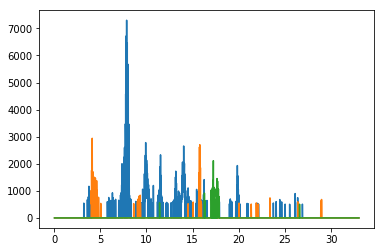

In [18]:
import os, sys
import numpy as np
import pymzml
import matplotlib.pyplot as plt
 
'''
First - get TIC data and length data
'''
 
# opens mzML data file and returns a generator
#msrun = pymzml.run.Reader("pbQC009.mzML", obo_version = '3.71.0')
msrun = pymzml.run.Reader("pbQC009.mzML", obo_version = '3.71.0') 
# access to TIC cata
times = msrun['TIC'].mz
intensities = msrun['TIC'].i
#print(times)
#print(intensities)
 
# this is the total length of the sample run
length =  max(times) - min(times)
 
'''
THe 'times' and 'intensities' lists are the x and y coordinates of the TIC
'''
 
'''
Second - get EIC data for user-defined peaks
'''
 
# opens mzML data file and returns a generator
#msrun = pymzml.run.Reader("pbQC009.mzML")
msrun = pymzml.run.Reader("pbQC009.mzML", obo_version = '3.71.0')
 
# come up with a data structure for storing the results
eicTargets = [100, 200, 300] # user defined
eicTol = 0.03 # user defined
 
# data structure to store reuslts
results = []
for eicTarget in eicTargets:
    results.append( {
        # these first three are important, send to server
        'target': eicTarget,
        'RTs' : [], # list to hold retention times
        'ints' :  [], # list to hold intensities
 
        # these last two are for generating the EIC only
        # ---> no need to send to server
        'lowerLimit' : eicTarget - eicTol,
        'upperLimit' : eicTarget + eicTol
        }    
    )
#print(results)
 
 
# iterate through spectra
for spectrum in msrun:
    try:
        time = spectrum['scan start time']
    except:
        break
 
    mzs = np.asarray(spectrum.mz)
    ints = np.asarray(spectrum.i)
 
    # iterate through targets
    for target in results:
        lowerLimit = target['lowerLimit']
        upperLimit = target['upperLimit']
 
        # find indices of mz values within
        mask = np.where( (mzs > lowerLimit) & (mzs < upperLimit) )
 
        eicInts = ints[mask]
 
        target['RTs'].append(time)
        target['ints'].append(np.sum(eicInts))
      
 
 
 
for target in results:
    plt.plot(target['RTs'], target['ints'])
    #print(target)
    #plt.show()
print(results)
plt.show()